In [38]:
## Importing Libries
import cv2 
import numpy as np
import time
import matplotlib.pyplot as plt

In [39]:
## Loading the video
video = cv2.VideoCapture("./videos/video_1.mp4")

## reading first frame for video
_, frame1 = video.read()
frame1 = cv2.resize(frame1, (0,0), fx = .50, fy = .50)
## reading the second frame from video
_, frame2 = video.read()
frame2 = cv2.resize(frame2, (0,0), fx = .50, fy = .50)


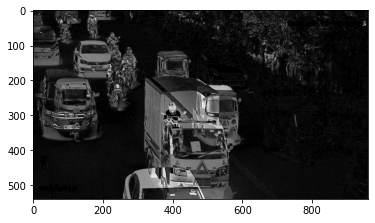

In [40]:
## uding absolute difference between frame1 and frame2 to get the mask image
absdiff_mask = cv2.absdiff(frame1, frame2)

## Converting it into gray scale
gray_absdiff_mask = cv2.cvtColor(absdiff_mask, cv2.COLOR_BGR2GRAY) 

## ploting image after appling threshold
plt.imshow(gray_absdiff_mask, cmap = 'gray')

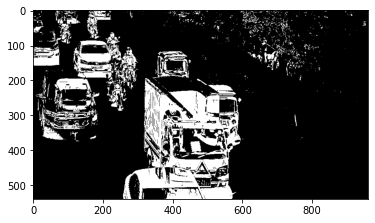

In [41]:
## appling the threshold on the absolute difference
_, thresh = cv2.threshold(gray_absdiff_mask, 60, 255, cv2.THRESH_BINARY)
#cv2.imshow("image with Threshold", thresh)
plt.imshow(thresh, cmap = 'gray')

In [42]:
## Displaying the masked and thresh in opencv

video = cv2.VideoCapture("./videos/video_1.mp4")

## reading first frame
_, frame1 = video.read()
frame1 = cv2.resize(frame1, (0,0), fx = .50, fy = .50)

while(1):
    ## reading the second frame
    _, frame2 = video.read()
    
    if _ == False:
        break
    # resizeing the frame and making it 50% smaller
    frame2 = cv2.resize(frame2, (0,0), fx = .50, fy = .50)

    ## uding absolute difference to get the mask image
    absdiff_mask = cv2.absdiff(frame1, frame2)
    gray_absdiff_mask = cv2.cvtColor(absdiff_mask, cv2.COLOR_BGR2GRAY)
    cv2.imshow("Mask vido", gray_absdiff_mask)
        
    ## appling the threshold on the absolute difference
    _, thresh = cv2.threshold(gray_absdiff_mask, 100, 255, cv2.THRESH_BINARY)
    cv2.imshow("After Applying Threshold", thresh)
    
    frame1 = frame2

    if cv2.waitKey(1) & 0xff == ord('q'):
        break
    time.sleep(0.01)

video.release()
result.release()
cv2.destroyAllWindows()

In [44]:
## Making a line and start counting the Vehicles
## Counting Vehicles that are crossing lines for video_1
import cv2 
import time
video = cv2.VideoCapture("./videos/video_1.mp4")

## reading first frame
_, frame1 = video.read()

count = 0
while video.isOpened():
    ## reading the second frame
    _, frame2 = video.read()
    
    if _ == False:
        break
    # making a copy of frame2 
    frame = frame2.copy()

    ## uding absolute difference to get the mask image
    absdiff_mask = cv2.absdiff(frame1, frame2)
    gray_absdiff_mask = cv2.cvtColor(absdiff_mask, cv2.COLOR_BGR2GRAY)
    
    ## appling the threshold on the absolute difference
    _, thresh = cv2.threshold(gray_absdiff_mask, 50, 255, cv2.THRESH_BINARY)
    #cv2.imshow("image with Threshold", thresh)
    
    ## displaying a line on the the frame
    cv2.line(img = frame, pt1 = (0, 600), pt2 = (1200, 600), color = (0,255,0), thickness = 2)
    
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    for i in contours:
        # If the area of contoure is smaller then 20000 then we will not consider it
        if cv2.contourArea(i) < 20000:
            continue
                    
        x,y,w,h = cv2.boundingRect(i)
        # Drawing a rectangle around the moving objects
        cv2.rectangle(img = frame, pt1 = (x,y), pt2 = (x+w, y+h), color = (255, 0,0), thickness = 2)
        
        # Calculating ymid of the rectangles
        ymid = (y + (y+h))/2
        # when the rectangle comes in the range 570-630 then the count will be increased
        if ymid > 570 and ymid < 630:
            count += 1
    # Preparing the text to be displayed up on screen 
    text = "Vehicle count: "+ str(count)
    # writing the text on the screen
    frame = cv2.putText(img = frame, text = text, org = (100,100), fontFace = cv2.FONT_HERSHEY_SIMPLEX,
                        fontScale = 1, color = (255,255,0), thickness = 3)
    # Displaying the final result
    cv2.imshow("frame", frame)
    
    # making the current frame as frame1
    frame1 = frame2
    if cv2.waitKey(1) & 0xff == ord('q'):
        break
    ## Sleeptime of 0.01 seconds is applied because the result video is moving fast
    time.sleep(.01)
video.release()
cv2.destroyAllWindows()